In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [66]:
df = pd.read_csv("candidatos_info_politica.csv", sep=';', encoding="ANSI")

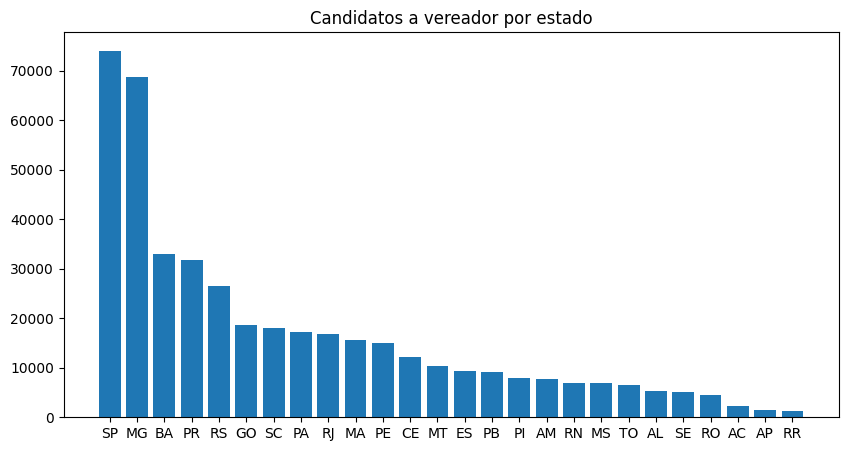

In [68]:
df_candidatos_vereador = df[df["DS_CARGO"]== "VEREADOR"]
df_candidatos_vereador_by_uf = df_candidatos_vereador[["SG_UF", "NM_URNA_CANDIDATO"]].groupby(["SG_UF"]).count()
df_candidatos_vereador_by_uf = df_candidatos_vereador_by_uf.sort_values(by="NM_URNA_CANDIDATO", ascending=False)
fig = plt.figure(figsize = (10, 5))
plt.bar(df_candidatos_vereador_by_uf.index, df_candidatos_vereador_by_uf["NM_URNA_CANDIDATO"], width=0.8)
plt.title("Candidatos a vereador por estado")
plt.show()

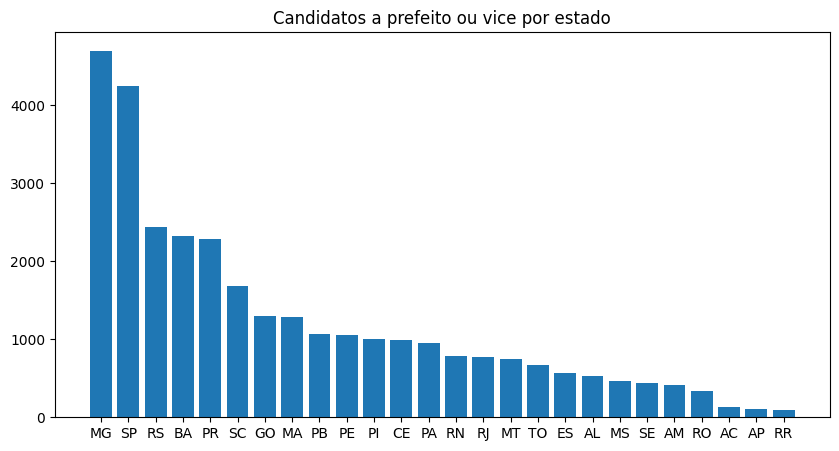

In [72]:
df_candidatos_prefeito_vice = df[df["DS_CARGO"] != "VEREADOR"]
df_candidatos_prefeitura_by_uf = df_candidatos_prefeito_vice[["SG_UF", "NM_URNA_CANDIDATO"]].groupby(["SG_UF"]).count()
df_candidatos_prefeitura_by_uf = df_candidatos_prefeitura_by_uf.sort_values(by="NM_URNA_CANDIDATO", ascending=False)
fig = plt.figure(figsize = (10, 5))
plt.bar(df_candidatos_prefeitura_by_uf.index, df_candidatos_prefeitura_by_uf["NM_URNA_CANDIDATO"], width=0.8)
plt.title("Candidatos a prefeito ou vice por estado")
plt.show()

In [77]:
populcacao_por_estados = pd.read_csv("população_estados.csv", sep=";") # Nomes de arquivos não deveriam ter ã ç 
df_candidatos_vereador_by_uf = df_candidatos_vereador_by_uf.merge(populcacao_por_estados, on="SG_UF")

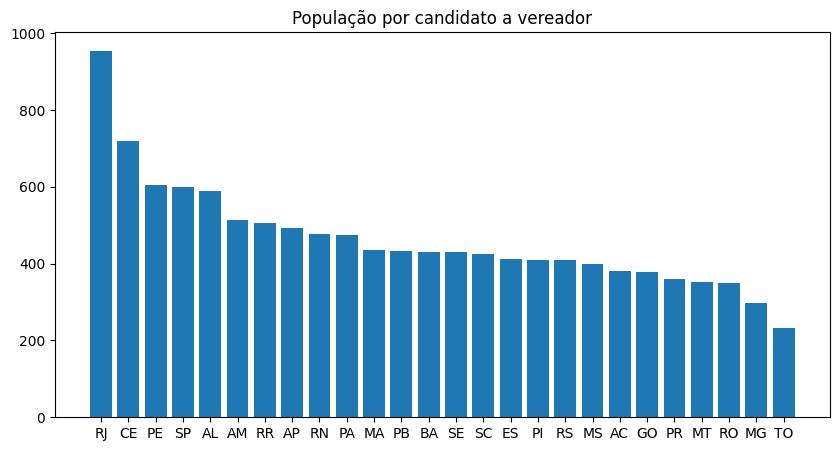

In [78]:
df_candidatos_vereador_by_uf["POP_CANDIDATO"] = df_candidatos_vereador_by_uf["POPULACAO"]/df_candidatos_vereador_by_uf["NM_URNA_CANDIDATO"]
df_candidatos_vereador_by_uf = candidatos_vereador_uf.sort_values(by="POP_CANDIDATO", ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(df_candidatos_vereador_by_uf["SG_UF"], df_candidatos_vereador_by_uf["POP_CANDIDATO"])
plt.title("População por candidato a vereador")
plt.show()

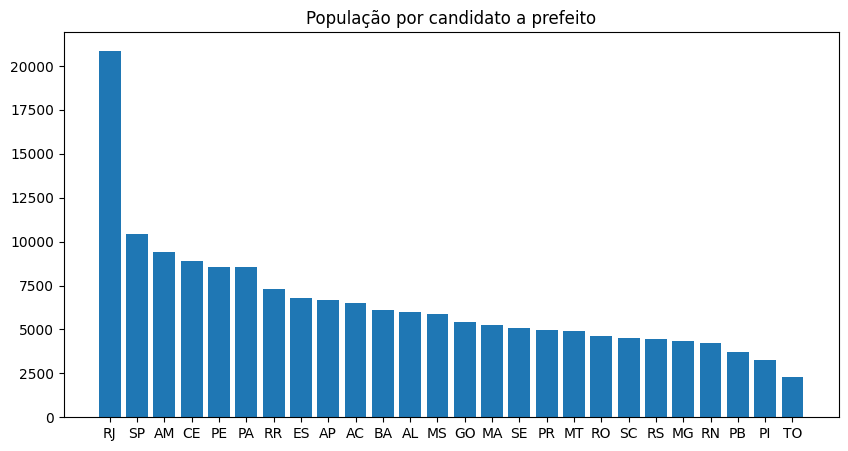

In [79]:
df_candidatos_prefeitura_by_uf = df_candidatos_prefeitura_by_uf.merge(populcacao_por_estados, on="SG_UF")
df_candidatos_prefeitura_by_uf["POP_CANDIDATO"] = df_candidatos_prefeitura_by_uf["POPULACAO"]/df_candidatos_prefeitura_by_uf["NM_URNA_CANDIDATO"]
df_candidatos_prefeitura_by_uf = df_candidatos_prefeitura_by_uf.sort_values(by="POP_CANDIDATO", ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(df_candidatos_prefeitura_by_uf["SG_UF"], df_candidatos_prefeitura_by_uf["POP_CANDIDATO"])
plt.title("População por candidato a prefeito")
plt.show()